<a href="https://colab.research.google.com/github/youngbinYoon/opencv/blob/master/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2

In [0]:
from google.colab import drive

drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
src = cv2.imread('/gdrive/My Drive/KerasTask/3.jpg')

In [0]:
import matplotlib.image as img
import matplotlib.pyplot as plt

fileName = '/gdrive/My Drive/KerasTask/test.png'

src = img.imread(fileName)

plt.imshow(src)

FileNotFoundError: ignored

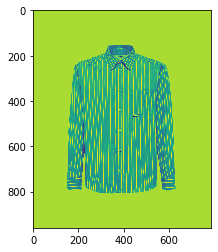

In [0]:
import numpy as np
import cv2

src = cv2.imread('/gdrive/My Drive/KerasTask/1.jpg')
imgray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
w, h = imgray.shape[:2]
templ = cv2.imread('/gdrive/My Drive/KerasTask/2.jpg', cv2.IMREAD_GRAYSCALE)
templ_h, templ_w = templ.shape[:2]
res = cv2.matchTemplate(imgray, templ, cv2.TM_CCOEFF_NORMED)
loc = np.where(res >= 0.5)
for pt in zip(*loc[::-1]):
  cv2.rectangle(src, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
plt.imshow(src)
plt.imshow(templ)

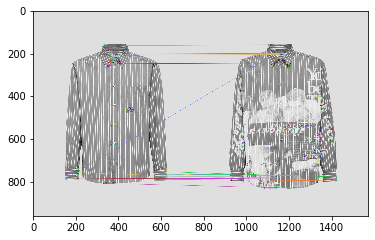

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('/gdrive/My Drive/KerasTask/2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/gdrive/My Drive/KerasTask/1.jpg', cv2.IMREAD_GRAYSCALE)
res = None

orb = cv2.ORB_create()

# 이미지1과 이미지2의 키포인트들과 디스크립터 계산
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# brute-force 매칭 객체를 normType의 값을 아래와 같이 설정하고 생성
# 두 이미지의 디스크립터들을 매칭하여 그 결과를 matches 변수에 담기
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x:x.distance)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], res, flags=0)

plt.imshow(res)
plt.show()

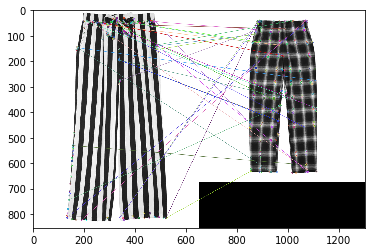

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('/gdrive/My Drive/KerasTask/3.JPG', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/gdrive/My Drive/KerasTask/4.JPG', cv2.IMREAD_GRAYSCALE)
res = None

orb = cv2.ORB_create()

# 이미지1과 이미지2의 키포인트들과 디스크립터 계산
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# brute-force 매칭 객체를 normType의 값을 아래와 같이 설정하고 생성
# 두 이미지의 디스크립터들을 매칭하여 그 결과를 matches 변수에 담기
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x:x.distance)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], res, flags=0)

plt.imshow(res)
plt.show()

len(kp)= 361
len(filtered_kp)= 71
des.shape= (71, 32)
des= [[ 49 141 106 ... 170 112 232]
 [  2 221  18 ...  92 181 155]
 [ 56 141 106 ... 234 240 168]
 ...
 [ 82 160 212 ...  40  81   0]
 [ 30  12  44 ...  99 118 166]
 [ 18 160 212 ...  40 113 128]]


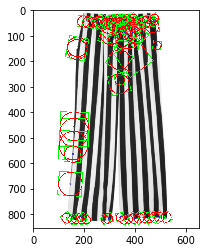

In [0]:
# 0906.py
import cv2
import numpy as np
#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

#2
src = cv2.imread('/gdrive/My Drive/KerasTask/3.JPG')
##src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

##orbF = cv2.ORB_create()           # HARRIS_SCORE
orbF = cv2.ORB_create(scoreType=1)  # FAST_SCORE
kp= orbF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
plt.imshow(dst)

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = list(filter(lambda f: f.response>50, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = orbF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    #print('f.angel=', f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
plt.imshow(dst2)
plt.show()


윤곽선 검출해서 배경 흰색으로 바꾸기?

len(contours)= 5
maxLength= 5211.692555069923


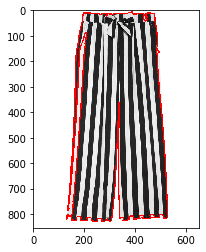

In [0]:
import cv2
#1
src = cv2.imread('/gdrive/My Drive/KerasTask/3.JPG')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
##bImage = cv2.erode(bImage, None)
bImage = cv2.dilate(bImage, None)
##cv2.imshow('src',  src)
#cv2.imshow('bImage',  bImage)

#2
mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
image, contours, hierarchy = cv2.findContours(bImage, mode, method)
print('len(contours)=', len(contours))

maxLength = 0
k = 0
for i, cnt in enumerate(contours):
    perimeter = cv2.arcLength(cnt, closed = True)
    if perimeter> maxLength:
        maxLength = perimeter
        k = i
print('maxLength=', maxLength)
cnt = contours[k]
dst2 = src.copy()
cv2.drawContours(dst2, [cnt], 0, (255,0,0), 3)
##cv2.imshow('dst2',  dst2)
plt.imshow(dst2)

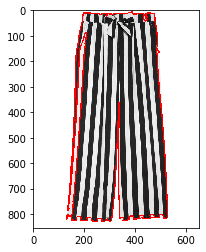

In [0]:
plt.imshow(dst2)
cv2.imwrite()

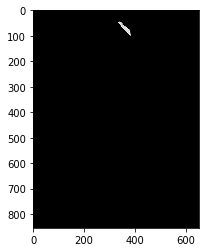

In [0]:
import cv2
import numpy as np

## (1) Read
img = cv2.imread('/gdrive/My Drive/KerasTask/3.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) Threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## (3) Find the min-area contour
_cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnts = sorted(_cnts, key=cv2.contourArea)
for cnt in cnts:
    if cv2.contourArea(cnt) > 100:
        break

## (4) Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)

## Save it
#cv2.imwrite("dst.png", dst)
plt.imshow(dst)

이미지 합성


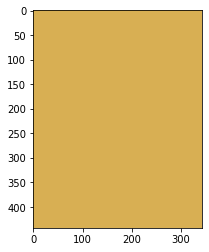

In [0]:
import cv2
background = cv2.imread('/gdrive/My Drive/KerasTask/blue.JPG')
logo = cv2.imread('/gdrive/My Drive/KerasTask/2.jpg')

plt.imshow(background)

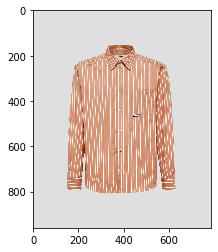

In [0]:
plt.imshow(logo)

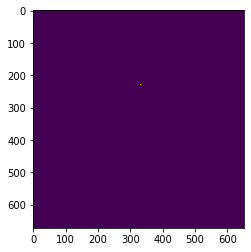

In [0]:
gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
_, mask_inv = cv2.threshold(gray_logo, 10, 255, cv2.THRESH_BINARY_INV)

plt.imshow(mask_inv)